![SolidQ](https://www.solidq.com/wp-content/uploads/2015/06/Logo-SolidQ-Web.gif)

# Teoría sobre la infidelidad matrimonial
http://www.statsmodels.org/stable/datasets/generated/fair.html
  
https://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf 

In [0]:
#Importamos los modulos y librerias que vamos a necesitar
!pip install statsmodels
!pip install scipy==1.2 --upgrade

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

from patsy import dmatrices

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#dta.columns = ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb','affairs']

In [0]:
#Cargamos los datos
dta = sm.datasets.fair.load_pandas().data
dta.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


In [0]:
#Informacion sobre el dataset: descripcion general, origen, 
#definicion de variables,tipo de variables

print(sm.datasets.fair.NOTE)
print(sm.datasets.fair.SOURCE)
print(sm.datasets.fair.DESCRLONG)

dta.info()

In [0]:
#Comprobamos que no falten datos (Resultado booleano: true=falta dato, false=dato)
#Tambien se puede visualizar si faltan datos con los mapas de calor de seaborn.
#En este caso, no hace falta.

dta.isnull().head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


El signo del índice de correlación también nos da información.  Si el índice de correlación entre dos variables es positivo, significa que, si una de ellas aumenta, la otra también lo hace. Por el contrario,  cuando el signo es negativo, si una variable aumenta, la otra, disminuye.  Por ejemplo, para affairs y rate_marriage es negativo. Esto indica que las personas que valoran más su matrimonio (rate_marriage creciente), tienen menos aventuras extramaritales (affairs decreciente).

In [0]:
# Veamos ahora la matriz de correlacion. 
# Deberiamos eliminar las variables altamente correlacionadas >0,90
# Edad, años matrimonio-- logica
# Correlacion positiva--religious/rate marriage,age/yrs_marriage
# Correlacion negativa: affairs/children, religious

print(dta.corr())


                 rate_marriage       age  ...  occupation_husb   affairs
rate_marriage         1.000000 -0.111127  ...         0.027745 -0.178068
age                  -0.111127  1.000000  ...         0.162567 -0.089964
yrs_married          -0.128978  0.894082  ...         0.128135 -0.087737
children             -0.129161  0.673902  ...         0.086660 -0.070278
religious             0.078794  0.136598  ...         0.004061 -0.125933
educ                  0.079869  0.027960  ...         0.183932 -0.017740
occupation            0.039528  0.106127  ...         0.201156  0.004469
occupation_husb       0.027745  0.162567  ...         1.000000 -0.015614
affairs              -0.178068 -0.089964  ...        -0.015614  1.000000

[9 rows x 9 columns]


In [0]:

#Edad, años matrimonio-- logicamente no son independientes, para eliminarlos habria que hacer:
#dta.drop(['age','yrs_married'],axis=1,inplace=True)
#dta.head()

El histograma sobre la influencia del nivel educativo también arroja resultados interesantes. El menor número de infidelidades se produce en los niveles extremos: mujeres con nivel básico de educación o profesionales con una muy alta cualificación-

Text(0, 0.5, 'Frecuencia infidelidad')

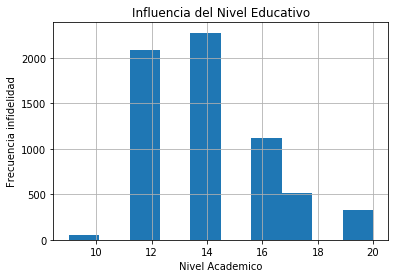

In [0]:
#Para que muestre los graficos en el notebook añadimos:
#%matplotlib inline

# histograma sobre influencia del nivel educativo
dta.educ.hist()
plt.title('Influencia del Nivel Educativo')
plt.xlabel('Nivel Academico')
plt.ylabel('Frecuencia infidelidad')

También podemos observar la influencia de los años de matrimonio:

Text(0, 0.5, 'Frecuencia infidelidad')

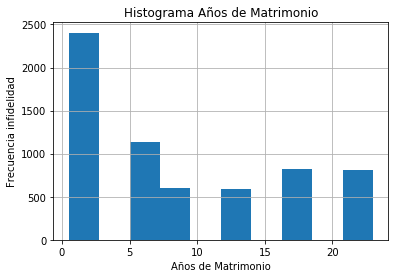

In [0]:


# histograma sobre influencia de los años de matrimonio
dta.yrs_married.hist()
plt.title('Histograma Años de Matrimonio')
plt.xlabel('Años de Matrimonio')
plt.ylabel('Frecuencia infidelidad')

In [0]:
#Creamos una nueva variable binaria "infidelidad" para tratarlo como un problema de clasificación 0=fiel, 1=infiel
#Mostramos los primeros....infieles
dta['infidelidad']=(dta.affairs>0).astype(int)
print(dta.head(10))
dta.shape

   rate_marriage   age  yrs_married  ...  occupation_husb   affairs  infidelidad
0            3.0  32.0          9.0  ...              5.0  0.111111            1
1            3.0  27.0         13.0  ...              4.0  3.230769            1
2            4.0  22.0          2.5  ...              5.0  1.400000            1
3            4.0  37.0         16.5  ...              5.0  0.727273            1
4            5.0  27.0          9.0  ...              4.0  4.666666            1
5            4.0  27.0          9.0  ...              4.0  4.666666            1
6            5.0  37.0         23.0  ...              4.0  0.852174            1
7            5.0  37.0         23.0  ...              3.0  1.826086            1
8            3.0  22.0          2.5  ...              3.0  4.799999            1
9            3.0  27.0          6.0  ...              5.0  1.333333            1

[10 rows x 10 columns]


(6366, 10)

In [0]:
feature_names = ['rate_marriage', 'age', 'yrs_married', 'children','religious','educ','occupation','occupation_husb']
X = dta[feature_names]
y = dta['infidelidad']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
  random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
X_train

array([[1.        , 0.3877551 , 0.24444444, ..., 0.63636364, 0.2       ,
        1.        ],
       [0.75      , 1.        , 1.        , ..., 0.45454545, 0.4       ,
        0.8       ],
       [1.        , 0.79591837, 1.        , ..., 0.45454545, 0.4       ,
        0.8       ],
       ...,
       [0.5       , 0.18367347, 0.08888889, ..., 0.45454545, 0.4       ,
        0.6       ],
       [1.        , 0.18367347, 0.        , ..., 0.45454545, 0.4       ,
        0.8       ],
       [0.75      , 0.18367347, 0.08888889, ..., 0.27272727, 0.4       ,
        0.2       ]])

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.95
Accuracy of Decision Tree classifier on test set: 0.65


In [0]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
lr = regressor.fit(X_train, y_train)

In [0]:
lr.score(X_train,y_train)

0.15955031432335953

In [0]:
#Realizamos la predicción con test
print(lr.predict(X_test))

[0.58726202 0.00382948 0.34026419 ... 0.46727903 0.20987881 0.25617711]
